
## Structure
* Matplotlib Basemap Plot trick
* ArcGIS Python API Intro
* ArcGIS Case Studies
    * Basic mapping 
    * (2nd file)GIS data (content) search & create (from csv/Pandas) & Publish as a layer
    * (2nd file)Travel planning
    * Interactive map 
    * Fire station service area estimation

### Basemap-Matplotlib trick:inset plots

In [ ]:
%pylab inline
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [ ]:
#https://python4astronomers.github.io/plotting/advanced.html
#Axis is the axis of the plot, the thing that gets ticks and tick labels. The axes is the area your plot appears in.
def plot_sub(x,y,pos,fig):
    subax = fig.add_axes(pos)
    subax.plot(x,y,'--',color="#f7ef04",linewidth=1.0)
    subax.spines['bottom'].set_linewidth(1)
    subax.spines['top'].set_linewidth(1)
    subax.spines['left'].set_linewidth(1)
    subax.spines['right'].set_linewidth(1)
    subax.xaxis.label.set_size(400)
    subax.yaxis.label.set_size(400)
    plt.title('name')
    plt.grid()

In [ ]:
fig = plt.figure(figsize=(5,5),dpi=100)
ax = fig.add_subplot(111)
mapp = Basemap(llcrnrlon=128.819757266426611, 
              llcrnrlat=29.583851612359275, 
              urcrnrlon=147.841589961763497, 
              urcrnrlat=44.598674173123,resolution = 'h')
# projection='cyl',lon_0, lar_0 , projection='ortho'(give u a globe)
mapp.drawmapboundary(linewidth=0.5) #  draw a line around the map region
#mapp.fillcontinents(color='coral',lake_color='aqua')
mapp.drawcoastlines(linewidth=0.5)
mapp.drawcountries(linewidth=0.3)  #conda install -c conda-forge basemap-data-hires

mapp.ax=ax # now we cast the spell  

x=[1,3,5,6,7]
y=[23,21,33,35,28]
pos=[0.42,0.35,0.09,0.1]
plot_sub(x,y,pos,fig=fig)

pos=[0.7,0.25,0.09,0.1]
plot_sub(x,y,pos,fig=fig)

# Overview of the ArcGIS API for Python

The ArcGIS API for Python is a  Pythonic library to perform `GIS visualization and analysis`, `spatial data management` and `GIS system administration` tasks that can run both interactively, and using scripts.

The API makes it easy and natural for a Python programmer to use ArcGIS.


## Architecture of the API
The API is distributed as the `arcgis` package via conda and pip. Within the `arcgis` package. Each module has a handful of types and functions that are focused towards one aspect of the GIS.

This diagram below depicts the modules present in the API.

In [1]:
from IPython.display import Image
from IPython.display import display

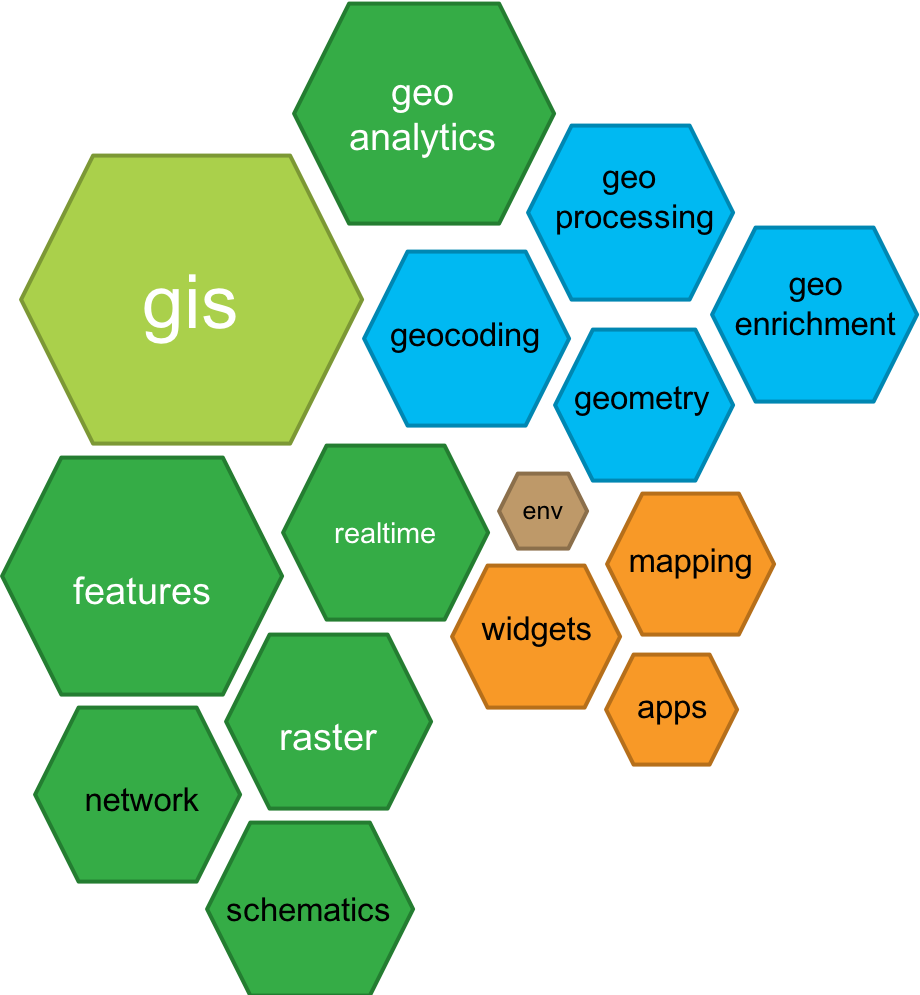

In [2]:
Image("/Users/zhang.xiaoya/Desktop/guide_api_overview_modules.png",width=400)

The `gis` module is the most important and provides the entry point into the GIS. It lets you manage users, groups and content in the GIS. GIS admins spend a lot of time on this module.

The modules in green are used to access the various spatial capabilities or geographic datasets in the GIS. These modules include a family of geoprocessing functions, types and other helper objects for working with spatial data of a particular type.

The modules in blue provide additional functionality for your workflows. They include the `geocoding` module which is for finding places, the `geometry` module for representing the geometries of feature data and functions for working with them, the `geoprocessing` module that makes it easy to import third party geoprocessing tools and work with them and the `geoenrichment` module that helps you enrich your datasets with thematic information.

The modules in orange allow you to visualize and disseminate your GIS data and analysis. The `widgets` module includes the MapView Jupyter notebook widget for visualizing maps and layers, the `mapping` module has types and functions for working with web maps and web layers and the `apps` module helps you create and manage web applications built with ArcGIS.


In [4]:
from arcgis.gis import GIS

In [5]:
gis=GIS()

In [6]:
map1 = gis.map("目黒区,東京都",13)
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=13.0)

In [7]:
#when you dont know what Arguments it take...
gis?

In [8]:
map1.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [9]:
map1.basemap = 'dark-gray-vector'

The above cell updated the map widget, if you scroll to the top, you can notice a new trail layer being rendered on the map.

In [10]:
map1.center

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'x': 15551140.653019678,
 'y': 4251402.413731839}

## Architecture of the gis module
This module provides functionality to manage (create, read, update and delete) GIS users, groups and content. This module is the most important and provides the entry point into the GIS. 

Below is a graphic of the `gis` module and its various classes:


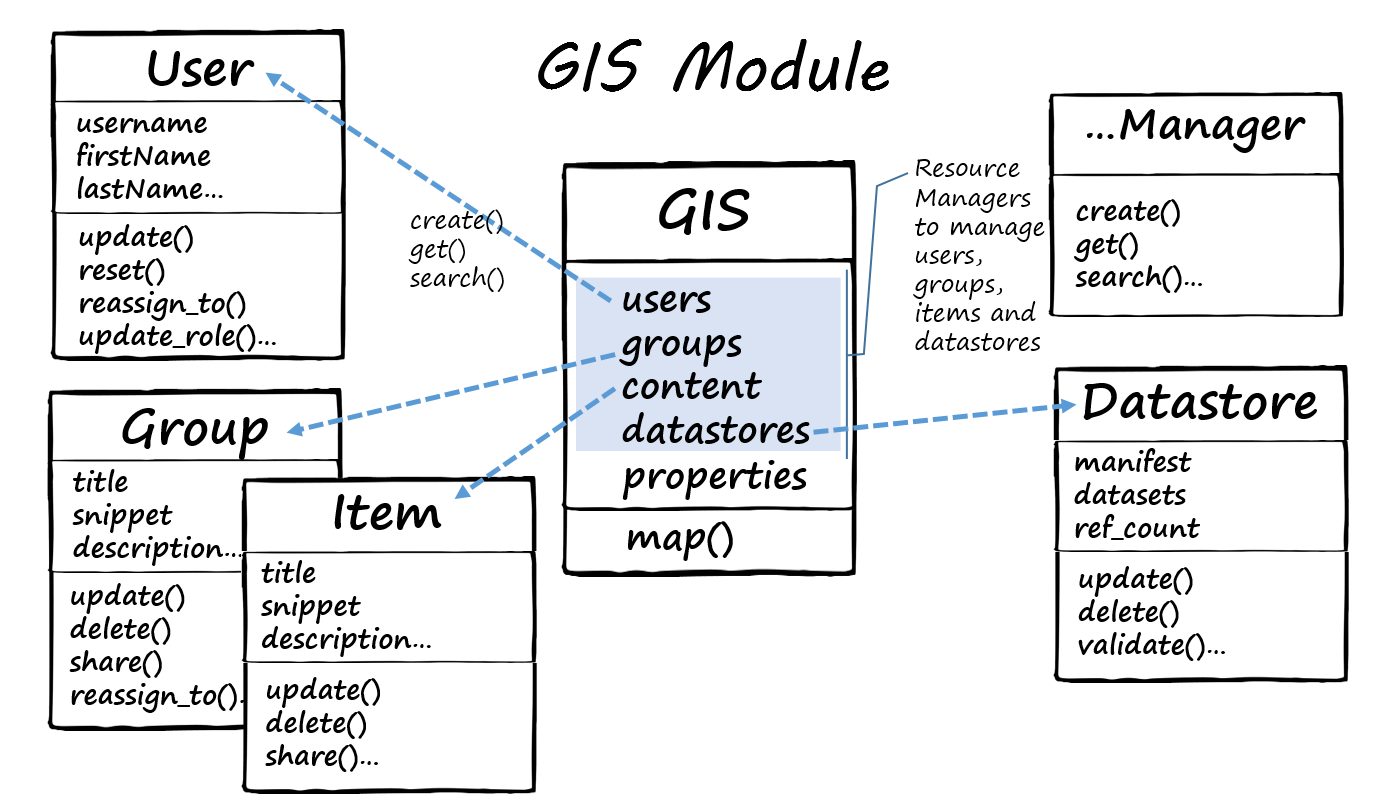

In [3]:
Image("/Users/zhang.xiaoya/Desktop/gis-module.png",width=800)

In [ ]:
# debug 
# https://community.esri.com/groups/arcgis-python-api

## Accessing and creating content (see a separate notebook)






## Service Area Estimation
make create dynamic, interactive 'apps'. 
function_name(map_inst, geometry), with map_inst being the MapView instance, and geometry being the geometry instance that the user clicked.

In [11]:
import arcgis.geocoding as geocoding

In [12]:
gis = GIS()
callback_map = gis.map('新宿区,東京都', 16)

In [15]:
callback_map.on_click?
#geocoding.reverse_geocode?

In [14]:
#callback_map.legend=True
def find_addr(callback_map, g):
    try:
        callback_map.draw(g)
        geocoded = geocoding.reverse_geocode(g) #reverse_geocode operation determines the address at a particular x/y location
        #print(geocoded['location'])
        print(geocoded['address']['Match_addr'])
    except:
        print("Couldn't match address. Try another place...")
callback_map.on_click(find_addr)
callback_map

MapView(layout=Layout(height='400px', width='100%'), zoom=16.0)

東京都新宿区歌舞伎町１-６-２
東京都新宿区新宿６-２８-７


### Search for Service on Vicinity 
1. import the geocode function from the ArcGIS API for Python
2. Create an anonymous connection to ArcGIS Online. Since the results are not stored, you do not need credentials to call the geocoding service

In [16]:
from arcgis.geocoding import geocode

In [ ]:
geocode?

3. Pass the relevant parameters into the geocode function and get the results

In [17]:
geocode_fs = geocode(address=None,
                     location=[-0.121571,51.509780],
                     category="Coffee shop",
                     out_fields="Place_addr, PlaceName",
                     max_locations=25,
                     as_featureset=True)

**4.** Convert the results to a dataframe and show the first two locations

In [18]:
g_df = geocode_fs.df
g_df.head()

,OBJECTID,PlaceName,Place_addr,SHAPE
0,1,Paul,"Strand, London, England, WC2N 6","{'x': -0.12228999999996404, 'y': 51.5101100000..."
1,2,Costa Coffee,"Strand, London, England, WC2R 0","{'x': -0.12164999999993142, 'y': 51.5104100000..."
2,3,Caffe Nero,"Durham House Street, London, England, WC2N 6","{'x': -0.1230699999999274, 'y': 51.50955000000..."
3,4,Casa Manolo,"99 Strand, London, England, WC2R 0","{'x': -0.12072996335623018, 'y': 51.5107199888..."
4,5,Caffe Nero,"65 Strand, London, England, WC2N 6","{'x': -0.12325999999995929, 'y': 51.5097000000..."


**5.** Create a map to display the results

In [19]:
g_map = gis.map('london', zoomlevel=11)
g_map

MapView(layout=Layout(height='400px', width='100%'), zoom=11.0)

**6.** Once the map has loaded, draw the results

In [20]:
g_map.draw(geocode_fs)

# Constructing drive time based service areas
This sample shows how the `network` module of the ArcGIS API for Python can be used to construct `service areas`. 

In this sample, we generate service areas for two of the fire stations in central Tokyo, Japan. 

Service areas  help evaluate accessibility. Concentric service areas show how accessibility varies. Once service areas are created, you can use them to identify how much land, how many people, or how much of anything else is within the neighborhood or region.
Service area solver provides functionality for finding out how far a vehicle could go within a specified time.

In [21]:
import getpass
develoersUser = 'xiaoya_gis'
develoersPass =getpass.getpass(prompt='password pls')
my_gis = GIS("https://www.arcgis.com",develoersUser,develoersPass)
user = gis.users.get(develoersUser)

password pls········


### Create a Network Layer
To perform any network analysis (such as service area around a facility), you would need to create a `NetworkLayer` object. In this sample, since we are creating service areas, we need to create a `ServiceAreaLayer` which is a type of `NetworkLayer`.

To create any `NetworkLayer` object, you would need to provide the URL to the appropriate network analysis service. Hence, in this sample, we provide a `serviceArea` URL to create a `ServiceAreaLayer` object. 

Since all ArcGIS Online organizations already have access to those routing services, you can access this URL through the `GIS` object's `helperServices` property. If you have your own ArcGIS Server based map service with network analysis capability enabled, you would need to provide the URL for this service.

Let us start by importing the `network` module

In [22]:
import arcgis.network as network

In [23]:
network.ServiceAreaLayer?

In [24]:
service_area_url = my_gis.properties.helperServices.serviceArea.url
service_area_url

'https://route.arcgis.com/arcgis/rest/services/World/ServiceAreas/NAServer/ServiceArea_World'

In [25]:
sa_layer = network.ServiceAreaLayer(service_area_url, gis=my_gis)

### Create fire station facility layer
We obtained the coordinates of two fire stations in Tokyo. We construct `Feature` and `FeatureSet` objects to represent them.

In [26]:
fire_station_1_coord = '139.546910,35.695729'#武蔵野消防署 武蔵境出張所
fire_station_2_coord = '139.673726,35.697988'#東京消防庁 中野消防署

from arcgis.features import Feature, FeatureSet

f1 = Feature(geometry={'x':float(fire_station_1_coord.split(',')[0]),
                      'y':float(fire_station_1_coord.split(',')[1])})

f2 = Feature(geometry={'x':float(fire_station_2_coord.split(',')[0]),
                      'y':float(fire_station_2_coord.split(',')[1])})

fire_station_fset = FeatureSet([f1,f2], geometry_type='esriGeometryPoint', 
                            spatial_reference={'latestWkid': 4326})

In [27]:
map1 = my_gis.map('Tokyo', zoomlevel=12)
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=12.0)

In [ ]:
map1.draw?

In [28]:
fire_truck_symbol = {"type":"esriPMS",
                     "url":"http://static.arcgis.com/images/Symbols/SafetyHealth/FireTruck.png",
                     "contentType": "image/png", "width":20, "height":20}

map1.draw(fire_station_fset, symbol=fire_truck_symbol)

## Compute the service area
To compute the service area (area accessible to each facility based on drive times), we use the `solve_service_area()` method of a `ServiceAreaLayer` object. As the fire trucks will be travelling away from the stations, we need to specify the direction of travel in the `travel_direction` parameter. Also, since for the type of vehicles is fire trucks, we could specify the travel mode to make it easier to supply all other related parameters.

In [29]:
travel_modes = sa_layer.retrieve_travel_modes()
truck_mode = [t for t in travel_modes['supportedTravelModes'] if t['name'] == 'Trucking Time'][0]

result = sa_layer.solve_service_area(fire_station_fset, default_breaks=[5,10,15], 
                                     travel_direction='esriNATravelDirectionFromFacility',
                                     travel_mode=truck_mode) #time_of_day=daytime, time_of_day_is_utc=False

In [30]:
travel_modes?

#### Read the result back as a `FeatureSet`
The `result` variable contains the service area as a dictionary. We inspect its keys and construct `Feature` and `FeatureSet` objects out of it to display in the map

In [31]:
result.keys()

dict_keys(['messages', 'saPolygons'])

In [32]:
result['saPolygons'].keys()

dict_keys(['fieldAliases', 'geometryType', 'spatialReference', 'features'])

In [33]:
poly_feat_list = []
for polygon_dict in result['saPolygons']['features']:
    f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
    poly_feat_list.append(f1)

In [34]:
service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])

In [35]:
service_area_fset.sdf

,FacilityID,FromBreak,Name,ObjectID,SHAPE,Shape_Area,Shape_Length,ToBreak
0,1,10,Location 1 : 10 - 15,1,"{""rings"": [[[139.55745887800003, 35.7409191130...",0.003145,0.820258,15
1,1,5,Location 1 : 5 - 10,2,"{""rings"": [[[139.557683945, 35.72699546800004]...",0.001552,0.452174,10
2,1,0,Location 1 : 0 - 5,3,"{""rings"": [[[139.55296516400006, 35.7081279750...",0.000512,0.120282,5
3,2,10,Location 2 : 10 - 15,4,"{""rings"": [[[139.70792579700003, 35.7575359340...",0.003696,1.109641,15
4,2,5,Location 2 : 5 - 10,5,"{""rings"": [[[139.6953487400001, 35.72385215800...",0.001935,0.466249,10
5,2,0,Location 2 : 0 - 5,6,"{""rings"": [[[139.6746883390001, 35.70947837800...",0.000605,0.134612,5


### Visualize the service area on the map
From the DataFrame above, we know, there are 3 service area polygons for each fire station. The drive times are given as a range between `FromBreak` and `ToBreak` columns. Let us use this information to visualize the polygons with different colors and appropriate popup messages on the map

In [36]:
#reference
#[ <red>, <green>, <blue>, <alpha> ]
#https://developers.arcgis.com/documentation/common-data-types/symbol-objects.htm
colors = {5: [0, 128, 0, 90], 
          10: [255, 255, 0, 90], 
          15: [255, 0, 0, 90]}

fill_symbol = {"type": "esriSFS","style": "esriSFSSolid",
               "color": [115,76,0,255]}

In [37]:
for service_area in service_area_fset.features: 
    #set color based on drive time
    fill_symbol['color'] = colors[service_area.attributes['ToBreak']]
    #set popup
    popup={"title": "Service area", 
            "content": "{} minutes".format(service_area.attributes['ToBreak'])}
    map1.draw(service_area.geometry, symbol=fill_symbol, popup=popup)